In [33]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [8]:
df = pd.read_csv("transport.csv",index_col=0,dtype={"transport":"category"})
df.head(6)

,transport
0,train
1,tram
2,car
3,car
4,tram
5,train


In [9]:
counts = df['transport'].value_counts()

# Mode

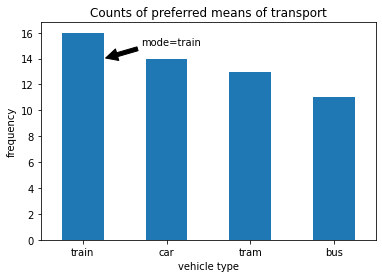

In [22]:
# Plot the counts as a bar chart. 
ax=counts.plot.bar(rot=0)

ax.set_title ('Counts of preferred means of transport') 
ax.set_xlabel('vehicle type')
ax.set_ylabel ('frequency') 

# Format counts as integers. 
ax.yaxis.set_major_formatter(mpl.ticker.EngFormatter(places=0)) 

# Find the mode so we can label it on the plot. 
mode = df['transport'].mode()[0] 

# Find the index of the mode in the plot. 
mode_pos = counts.index.get_loc(mode) 
ax.annotate('mode={}'.format(mode), xy=(mode_pos + 0.25, 14),
            xytext=(mode_pos+ 0.7, 15),
            #arrow pointing to the mode
            arrowprops=dict(facecolor='black',shrink=0.05)) 

plt.show() 

# Quantile Plot

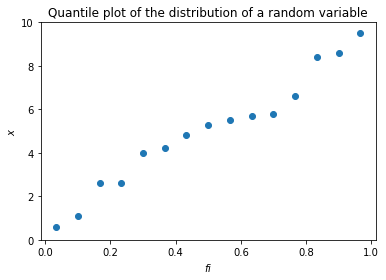

In [28]:
# Random data from Myatt and Johnson (2009) p. 46. 
x=pd.Series([0.6, 1.1, 2.6, 2.6, 4.0, 4.2, 4.8, 5.3, 5.5,
             5.7, 5.8, 6.6, 8.4, 8.6,9.5])

# Define an f-value function to calculate normalised f-values.
def fvalue(var):
    i= np.arange(1, len(var) + 1) 
    return (i-0.5) / len(var) 

fig, ax = plt.subplots(1) 
ax.scatter(fvalue(x), x) 
ax.set_ylim(0,10)
ax.set_xlabel('$fi$') 
ax.set_ylabel('$x$') 
ax.set_title( 'Quantile plot of the distribution of a random variable' ) 
plt.show() 

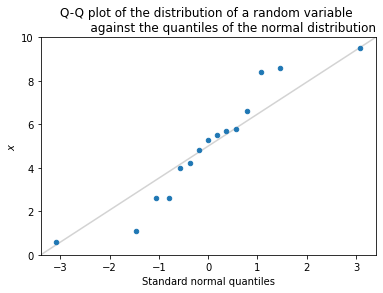

In [35]:
# Random data from Myatt and Johnson (2009) p. 46. 
df=pd.DataFrame({"x":[0.6, 1.1, 2.6, 2.6, 4.0, 4.2, 4.8, 5.3, 5.5,
             5.7, 5.8, 6.6, 8.4, 8.6,9.5]})

# Specify the quantizes, avoiding 0 and 1 which correspond to infinity 
# in the theoretical normal distribution. 
quantiles = np.linspace(0.001, 0.999, len(df)) 

# "stats.norm.ppf' normal distribution percent point function, 
# arguments are mean and standard deviation. This is the inverse Of 
# the cumulative distribution function 'stats.norm.cdf()' in other 
# words quantizes. 
df['norm_quantiles']=stats.norm.ppf(quantiles, 0, 1) 
ax=df.plot.scatter('norm_quantiles','x') 
ax.set_ylim(0,10) 
ax.set_xlabel('Standard normal quantiles')
ax.set_ylabel('$x$') 
ax.set_title('''Q-Q plot of the distribution of a random variable 
             against the quantiles of the normal distribution''')
# plot a reference line. 
ax.plot([0, 1],[0, 1], transform=ax.transAxes, color='lightgrey', zorder=-1)

plt.show()

# Skewness

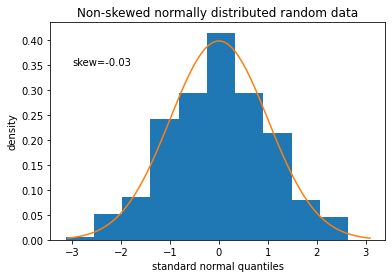

In [37]:
# Seed the random number generator. 
np.random.seed(8) 

# ploting pf histogram
s=pd.Series(np.random.normal(0,1,300)) #300 data set , mean 0 ,std 1
ax=s.plot.hist(density=True) 

# ploting for standard normal
quantiles=np.linspace(stats.norm.ppf(0.001),
                      stats.norm.ppf(0.999),100)
ax.plot(quantiles, stats.norm.pdf(quantiles)) 

ax.annotate(f'skew={s.skew().round(2)}', xy=(-3, 0.35)) #calculate skewness, and display
ax.set_xlabel('standard normal quantiles') 
ax.set_ylabel('density') 
ax.set_title('Non-skewed normally distributed random data') 
plt.show() 

C:\Users\Xj\AppData\Local\Temp\ipykernel_11912\2109878786.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s = s.append(pd.Series(np.random.normal(-2.5,2.1,100)),ignore_index=True) #adding skewed data


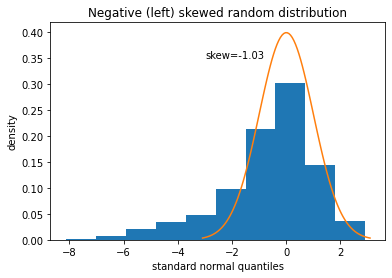

In [46]:
# Seed the random number generator. 
np.random.seed(8) 

s=pd.Series(np.random.normal(0,1,300)) #300 data set , mean 0 ,std 1
s = s.append(pd.Series(np.random.normal(-2.5,2.1,100)),ignore_index=True) #adding skewed data
ax=s.plot.hist(density=True) 
quantiles=np.linspace(stats.norm.ppf(0.001),
                      stats.norm.ppf(0.999),100)
ax.plot(quantiles, stats.norm.pdf(quantiles)) 

ax.annotate(f'skew={s.skew().round(2)}', xy=(-3, 0.35)) #calculate skewness, and display
ax.set_xlabel('standard normal quantiles') 
ax.set_ylabel('density') 
ax.set_title('Negative (left) skewed random distribution') 
plt.show() 

C:\Users\Xj\AppData\Local\Temp\ipykernel_11912\4210829685.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s = s.append(pd.Series(np.random.normal(-2.5,2.1,100)),ignore_index=True) #adding skewed data


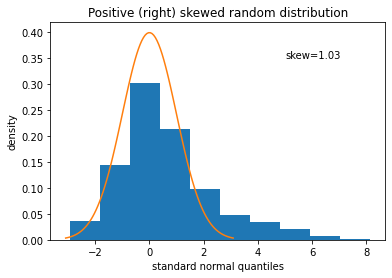

In [49]:
# Seed the random number generator. 
np.random.seed(8) 

s=pd.Series(np.random.normal(0,1,300)) #300 data set , mean 0 ,std 1
s = s.append(pd.Series(np.random.normal(-2.5,2.1,100)),ignore_index=True) #adding skewed data
s=-s
ax=s.plot.hist(density=True) 
quantiles=np.linspace(stats.norm.ppf(0.001),
                      stats.norm.ppf(0.999),100)
ax.plot(quantiles, stats.norm.pdf(quantiles)) 

ax.annotate(f'skew={s.skew().round(2)}', xy=(5, 0.35)) #calculate skewness, and display
ax.set_xlabel('standard normal quantiles') 
ax.set_ylabel('density') 
ax.set_title('Positive (right) skewed random distribution') 
plt.show() 

# Kurtosis

measures whether the data are heavy-tailed or light-tailed relative to normal distribution

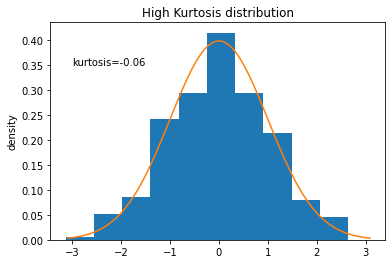

In [59]:
# Seed the random number generator. 
np.random.seed(8) 

s=pd.Series(np.random.normal(0,1,300)) #300 data set , mean 0 ,std 1
ax=s.plot.hist(density=True) 

x=np.linspace(stats.norm.ppf(0.001),
                      stats.norm.ppf(0.999),100)
ax.plot(quantiles, stats.norm.pdf(x)) 

######changes below
ax.annotate(f'kurtosis={s.kurtosis().round(2)}', xy=(-3, 0.35)) #calculate skewness, and display 
ax.set_ylabel('density') 
ax.set_title('High Kurtosis distribution') 
plt.show() 

C:\Users\Xj\AppData\Local\Temp\ipykernel_11912\664548810.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s=s.append(pd.Series(np.random.normal(0,2,300)), ignore_index=True)#####adding , more data


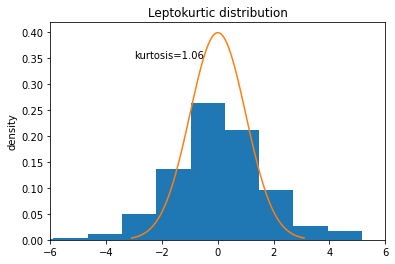

In [60]:
# Seed the random number generator. 
np.random.seed(8) 

s=pd.Series(np.random.normal(0,1,300)) #300 data set , mean 0 ,std 1
s=s.append(pd.Series(np.random.normal(0,2,300)), ignore_index=True)#####adding , more data, std 2
ax=s.plot.hist(density=True) 

x=np.linspace(stats.norm.ppf(0.001),
                      stats.norm.ppf(0.999),100)
ax.plot(quantiles, stats.norm.pdf(x)) 

ax.annotate(f'kurtosis={s.kurtosis().round(2)}', xy=(-3, 0.35)) #calculate skewness, and display 
ax.set_ylabel('density') 
ax.set_title('Leptokurtic distribution') 
ax.set_xlim(-6,6)
plt.show() 

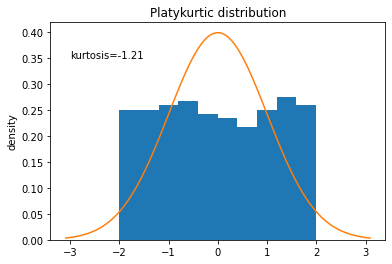

In [64]:
# Seed the random number generator. 
np.random.seed(5) 

# ploting of histogram
s=pd.Series(np.random.uniform(-2,2,300)) #300 data from -2 to 2, with no outliner
ax=s.plot.hist(density=True) 

# ploting for standard normal
x=np.linspace(stats.norm.ppf(0.001),
                      stats.norm.ppf(0.999),100)
ax.plot(quantiles, stats.norm.pdf(x)) 

ax.annotate(f'kurtosis={s.kurtosis().round(2)}', xy=(-3, 0.35)) #calculate skewness, and display 
ax.set_ylabel('density') 
ax.set_title('Platykurtic distribution') 
plt.show() 